# Credit Card Default

I work with the Credit Card Default dataset to classify how risky different customers are. We have data on various attributes, plus whether the customer defaulted on their payment next month or not.

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('data/default.xls', index_col=0, header=1)

## Exploratory Data Analysis

In [7]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [243]:
data = data.rename({'default payment next month': 'default'}, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [244]:
# Make train/test set
from sklearn.model_selection import train_test_split
seed = 42
train, test = train_test_split(data, test_size=0.2, random_state=seed)

In [10]:
# See what proportion of people default
train['default'].value_counts()

0    18677
1     5323
Name: default, dtype: int64

In [11]:
corr_matrix = train.corr()
corr_matrix['default'].sort_values(ascending=False)

default      1.000000
PAY_0        0.325840
PAY_2        0.266825
PAY_3        0.238275
PAY_4        0.220944
PAY_5        0.205067
PAY_6        0.188860
EDUCATION    0.030152
AGE          0.017088
BILL_AMT6   -0.005410
BILL_AMT5   -0.007508
BILL_AMT4   -0.010971
BILL_AMT2   -0.013775
BILL_AMT3   -0.014380
BILL_AMT1   -0.019299
MARRIAGE    -0.023826
SEX         -0.043076
PAY_AMT5    -0.049705
PAY_AMT3    -0.053817
PAY_AMT4    -0.054048
PAY_AMT6    -0.054989
PAY_AMT2    -0.056479
PAY_AMT1    -0.067933
LIMIT_BAL   -0.154328
Name: default, dtype: float64

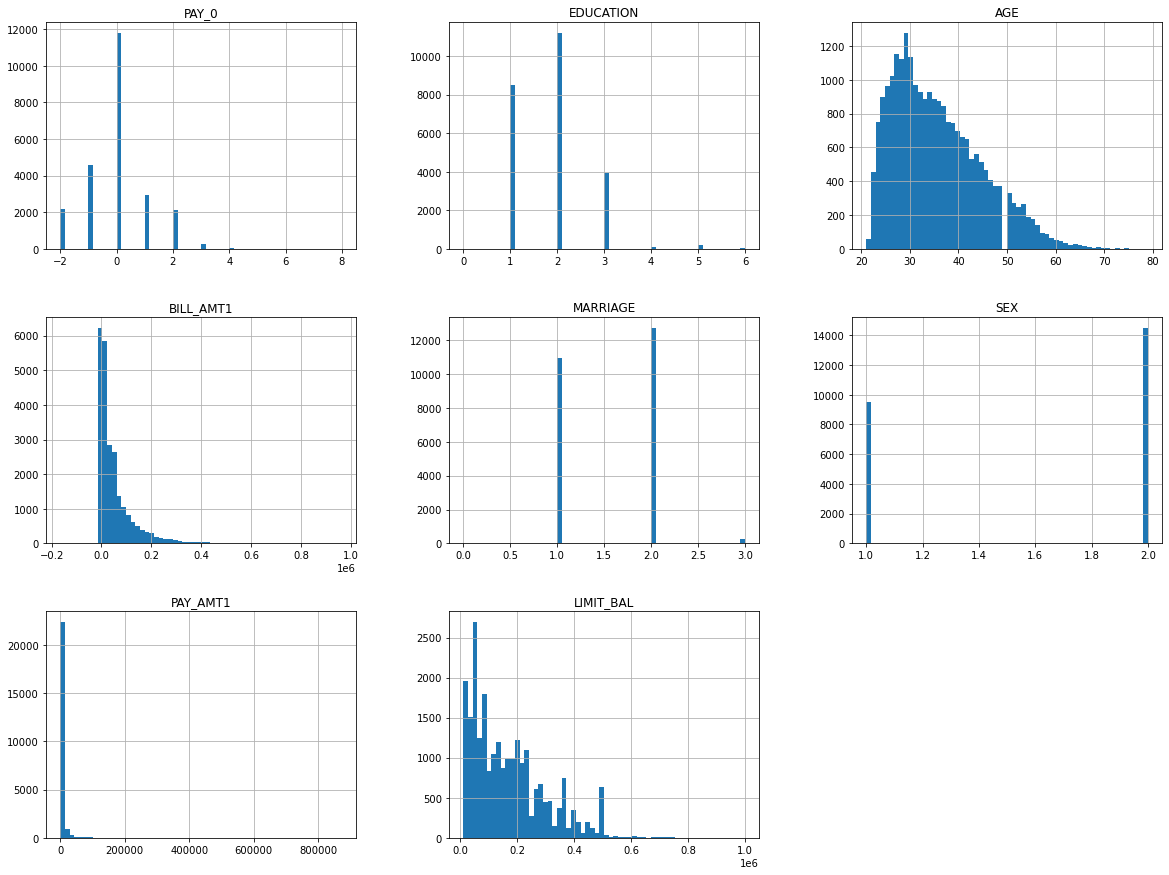

In [12]:
# Display some of the data distributions
display = ['PAY_0', 'EDUCATION', 'AGE', 'BILL_AMT1', 'MARRIAGE', 'SEX', 'PAY_AMT1', 'LIMIT_BAL']
train[display].hist(bins=60, figsize=(20, 15))
plt.show()

## Data Preparation

In [128]:
# Separate X and y
X = train.drop('default', axis=1)
y = train['default'].copy()
X_test = test.drop('default', axis=1)
y_test = test['default'].copy()

In [49]:
# Normalize attributes
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_prep = stdscaler.fit_transform(X)
X_test_prep = stdscaler.transform(X_test)

## Basic ML Models

In [271]:
# Base estimator. Measure f1 score, combination of precision/recall.
from sklearn.metrics import f1_score
pred = [1] * len(y)
f1_score(y, pred)

0.36415685918116963

In [146]:
# Alternate base estimator for accuracy
pred = [0] * len(y)
(pred == y).mean()

0.7782083333333333

In [154]:
# SVM classifier
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier()
svm.fit(X_prep, y)
pred = svm.predict(X_prep)
f1_score(pred, y)

0.3970066955494289

In [118]:
# Cross validation of SVM
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)
svm_cv = cross_val_score(svm, X_prep, y, cv=10, scoring=f1_scorer)
svm_cv.mean(), svm_cv.std()

(0.28673621764560736, 0.15209838314345192)

In [152]:
# Logistic regression classifier
log_reg = SGDClassifier(loss='log')
log_reg.fit(X_prep, y)
pred = log_reg.predict(X_prep)
f1_score(pred, y)

0.40969507427677876

In [119]:
# Cross validation of logistic regression
log_cv = cross_val_score(log_reg, X_prep, y, cv=10, scoring=f1_scorer)
log_cv.mean(), log_cv.std()

(0.3532325795829606, 0.07023309242949874)

In [127]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_prep, y)
pred = forest.predict(X_prep)
f1_score(pred, y)

0.9987783103091815

In [128]:
# Cross validation of random forest
forest_cv = cross_val_score(forest, X_prep, y, cv=3, scoring=f1_scorer)
forest_cv.mean(), forest_cv.std()

(0.4687796472014683, 0.004341792567924913)

### Fine Tuning

In [133]:
# Random forest performs well, so let's do some fine tuning
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [500, 1000], 'max_depth': [150, 450], 'max_features': [None]}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, params, scoring=f1_scorer, cv=2)
grid_search.fit(X_prep, y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [150, 450], 'max_features': [None],
                         'n_estimators': [500, 1000]},
             scoring=make_scorer(f1_score))

In [135]:
grid_search.best_params_

{'max_depth': 450, 'max_features': None, 'n_estimators': 1000}

In [148]:
model = grid_search.best_estimator_
pred = model.predict(X_test_prep)
f1_score(pred, y_test)

0.4598257502420136

In [149]:
# Accuracy
(pred == y_test).mean()

0.814

In [151]:
import pickle
pickle.dump(model, open('models/forest_model.pkl', 'wb'))

## NN Models

In [245]:
import torch
import torch.nn as nn
import torch.optim as optim

In [246]:
# Create separate validation set
train, val = train_test_split(train, test_size=0.25, random_state=seed)

# Redefine X and y
X = train.drop('default', axis=1)
y = train['default'].copy()
X_val = val.drop('default', axis=1)
y_val = val['default'].copy()

# Refit scaler
stdscaler = StandardScaler()
X_prep = stdscaler.fit_transform(X)
X_val_prep = stdscaler.transform(X_val)
X_test_prep = stdscaler.transform(X_test)

In [247]:
# Convert data to tensors
X_v = torch.tensor(X_prep, dtype=torch.float32)
y_v = torch.tensor(y.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_val_v = torch.tensor(X_val_prep, dtype=torch.float32)
y_val_v = torch.tensor(y_val.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_v = torch.tensor(X_test_prep, dtype=torch.float32)
y_test_v = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

In [260]:
# Define some networks
class NN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(23, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self, x):
        return self.net(x)
        
class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(23, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    
    def forward(self, x):
        return self.net(x)

class NN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(23, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )
    
    def forward(self, x):
        return self.net(x)

In [261]:
# Define models
loss_fn = nn.BCEWithLogitsLoss()
batch_size = 60

model1 = NN1()
model2 = NN2()
model3 = NN3()

optim1 = optim.Adam(model1.parameters(), weight_decay=0.0007)
optim2 = optim.Adam(model2.parameters(), weight_decay=0.003)
optim3 = optim.Adam(model3.parameters(), weight_decay=0.003)

In [258]:
from torch.utils.tensorboard import SummaryWriter

# Reset when testing new model
model, model_name, optimizer = model4, "model4", optim4
global_epoch = 0
min_loss = None

# Make summary writer
writer = SummaryWriter(f'runs/{model_name}')
writer.add_graph(model, X_v[0])
writer.add_embedding(X_v, metadata=y_v)

In [252]:
# Put data in dataloader
from torch.utils.data import Dataset, DataLoader

class DefaultDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_loader = DataLoader(DefaultDataset(X_v, y_v), shuffle=True, batch_size=batch_size)

In [253]:
# Training loop
def train(dataloader, model, loss_fn, optimizer, writer):
    step = 0
    avg_loss = 0.0
    
    for X, y in dataloader:
        # Make prediction
        pred = model(X)
        loss = loss_fn(pred, y)
        avg_loss += loss.item()
        
        # Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print summary data
        if (step + 1) % 100 == 0:
            avg_loss /= 100
            print('training loss: ', avg_loss)
            writer.add_scalar('training loss', avg_loss, global_step = global_epoch * len(dataloader) + step)
            avg_loss = 0.0
        step += 1

In [254]:
# Compute loss of model on X and y
def test(X, y, model, loss_fn):
    model.eval()
    with torch.no_grad():
        pred = model(X)
        loss = loss_fn(pred, y).mean().item()
    model.train()
    return loss

In [255]:
# Validation loop
def val(X, y, model, loss_fn, writer, model_name):
    loss = test(X, y, model, loss_fn)
    print('validation loss: ', loss)
    writer.add_scalar('validation loss', loss, global_step = global_epoch)
    if (global_epoch + 1) % 50 == 0:
        torch.save(model, f'models/{model_name}/{global_epoch+1}.pth')
    return loss

In [259]:
epochs = 500
for i in range(epochs):
    print(f"Epoch {i+1}\n------------------------------")
    train(train_loader, model, loss_fn, optimizer, writer)
    loss = val(X_val_v, y_val_v, model, loss_fn, writer, model_name)
    if min_loss is None or loss < min_loss:
        min_loss = loss
        print('New best model!')
        torch.save(model, f'models/{model_name}/best.pth')
    global_epoch += 1

Epoch 1
------------------------------
training loss:  0.5131336152553558
training loss:  0.4605822214484215
training loss:  0.4528678126633167
validation loss:  0.4416687786579132
New best model!
Epoch 2
------------------------------
training loss:  0.4379452282190323
training loss:  0.4416827428340912
training loss:  0.4524334970116615
validation loss:  0.43904218077659607
New best model!
Epoch 3
------------------------------
training loss:  0.4360485926270485
training loss:  0.436425464451313
training loss:  0.4460902193188667
validation loss:  0.43454962968826294
New best model!
Epoch 4
------------------------------
training loss:  0.42543349355459215
training loss:  0.4506446972489357
training loss:  0.4408260653913021
validation loss:  0.4417099952697754
Epoch 5
------------------------------
training loss:  0.44548611640930175
training loss:  0.43347820311784746
training loss:  0.4324962919950485
validation loss:  0.4331521689891815
New best model!
Epoch 6
-------------------

training loss:  0.43814634025096894
training loss:  0.4258007001876831
training loss:  0.42651524424552917
validation loss:  0.4351569712162018
Epoch 46
------------------------------
training loss:  0.426536930501461
training loss:  0.42879176437854766
training loss:  0.4352897107601166
validation loss:  0.4353019893169403
Epoch 47
------------------------------
training loss:  0.43179694697260856
training loss:  0.43040106147527696
training loss:  0.4287233552336693
validation loss:  0.43206846714019775
Epoch 48
------------------------------
training loss:  0.42977029353380203
training loss:  0.43632405310869216
training loss:  0.42176035210490226
validation loss:  0.4329625368118286
Epoch 49
------------------------------
training loss:  0.4300330296158791
training loss:  0.4321878665685654
training loss:  0.42922778487205504
validation loss:  0.4309787154197693
Epoch 50
------------------------------
training loss:  0.420199539065361
training loss:  0.4381173247098923
training los

training loss:  0.4245219668745995
validation loss:  0.43513932824134827
Epoch 90
------------------------------
training loss:  0.4251793004572392
training loss:  0.4307211223244667
training loss:  0.43191444903612136
validation loss:  0.4333178699016571
Epoch 91
------------------------------
training loss:  0.4309960696101189
training loss:  0.4203356373310089
training loss:  0.43183033406734467
validation loss:  0.4319589138031006
Epoch 92
------------------------------
training loss:  0.4265703508257866
training loss:  0.4354709222912788
training loss:  0.42338361233472827
validation loss:  0.4312395751476288
Epoch 93
------------------------------
training loss:  0.4272998321056366
training loss:  0.4227337191998959
training loss:  0.4339052802324295
validation loss:  0.43008989095687866
Epoch 94
------------------------------
training loss:  0.4303314259648323
training loss:  0.42572491586208344
training loss:  0.4271940341591835
validation loss:  0.43061962723731995
Epoch 95
--

training loss:  0.42690144419670106
training loss:  0.42969196185469627
training loss:  0.4263673235476017
validation loss:  0.4320441484451294
Epoch 135
------------------------------
training loss:  0.420484419465065
training loss:  0.43273196667432784
training loss:  0.4287589916586876
validation loss:  0.43057146668434143
Epoch 136
------------------------------
training loss:  0.41882643699645994
training loss:  0.4323742035031319
training loss:  0.4301782567799091
validation loss:  0.4297342896461487
Epoch 137
------------------------------
training loss:  0.42375497505068777
training loss:  0.4301260522007942
training loss:  0.42847308456897737
validation loss:  0.43115413188934326
Epoch 138
------------------------------
training loss:  0.4333510193228722
training loss:  0.41975863635540006
training loss:  0.4281419107317925
validation loss:  0.43124571442604065
Epoch 139
------------------------------
training loss:  0.4201006814837456
training loss:  0.44014970302581785
train

training loss:  0.42166364699602127
training loss:  0.4213005983829498
training loss:  0.4362365886569023
validation loss:  0.4309079647064209
Epoch 180
------------------------------
training loss:  0.4299923856556416
training loss:  0.42280193597078325
training loss:  0.42742603421211245
validation loss:  0.43451860547065735
Epoch 181
------------------------------
training loss:  0.4371155846118927
training loss:  0.4176762682199478
training loss:  0.4270454508066177
validation loss:  0.43140870332717896
Epoch 182
------------------------------
training loss:  0.42122809201478956
training loss:  0.4292545706033707
training loss:  0.4297568340599537
validation loss:  0.43032020330429077
Epoch 183
------------------------------
training loss:  0.4201209065318108
training loss:  0.43212259918451307
training loss:  0.42836117535829543
validation loss:  0.43212199211120605
Epoch 184
------------------------------
training loss:  0.43099177271127703
training loss:  0.43412465423345564
tra

training loss:  0.43159664869308473
validation loss:  0.4297836422920227
Epoch 224
------------------------------
training loss:  0.43739778101444243
training loss:  0.4155618461966515
training loss:  0.4272486957907677
validation loss:  0.4305136799812317
Epoch 225
------------------------------
training loss:  0.4328043678402901
training loss:  0.424676206111908
training loss:  0.42083301305770876
validation loss:  0.4292641282081604
Epoch 226
------------------------------
training loss:  0.42167558163404467
training loss:  0.4297046874463558
training loss:  0.43049764290452003
validation loss:  0.42930448055267334
Epoch 227
------------------------------
training loss:  0.4165587478876114
training loss:  0.42504504054784775
training loss:  0.4364960440993309
validation loss:  0.43121659755706787
Epoch 228
------------------------------
training loss:  0.42328328639268875
training loss:  0.42496526151895525
training loss:  0.43049523010849955
validation loss:  0.4302251935005188
Epo

training loss:  0.4273370584845543
training loss:  0.4211583052575588
training loss:  0.42934659838676453
validation loss:  0.4298587143421173
Epoch 269
------------------------------
training loss:  0.42364440083503724
training loss:  0.42368908882141115
training loss:  0.43134372144937516
validation loss:  0.42940255999565125
Epoch 270
------------------------------
training loss:  0.4289392900466919
training loss:  0.429285903275013
training loss:  0.42093987703323366
validation loss:  0.43027177453041077
Epoch 271
------------------------------
training loss:  0.41580617144703863
training loss:  0.4326805591583252
training loss:  0.4282104939222336
validation loss:  0.4308449625968933
Epoch 272
------------------------------
training loss:  0.43440761625766755
training loss:  0.4291394960880279
training loss:  0.41569562017917633
validation loss:  0.43062686920166016
Epoch 273
------------------------------
training loss:  0.4242257410287857
training loss:  0.4327743297815323
train

training loss:  0.42373732835054395
validation loss:  0.42954540252685547
Epoch 313
------------------------------
training loss:  0.42308811128139495
training loss:  0.4335410448908806
training loss:  0.4207727760076523
validation loss:  0.430012583732605
Epoch 314
------------------------------
training loss:  0.4351870948076248
training loss:  0.4303917053341866
training loss:  0.41115917414426806
validation loss:  0.4291455149650574
Epoch 315
------------------------------
training loss:  0.42316029608249667
training loss:  0.42903651535511017
training loss:  0.4263655251264572
validation loss:  0.4305979013442993
Epoch 316
------------------------------
training loss:  0.4218134416639805
training loss:  0.42996875554323194
training loss:  0.4283678317070007
validation loss:  0.4309098422527313
Epoch 317
------------------------------
training loss:  0.4361905257403851
training loss:  0.4229159200191498
training loss:  0.41939629092812536
validation loss:  0.4309144616127014
Epoch 

KeyboardInterrupt: 

In [262]:
# Test loss
model3_best = torch.load('models/model3/best.pth')
model3_800 = torch.load('models/model3/800.pth')
loss1 = test(X_test_v, y_test_v, model3_best, loss_fn)
loss2 = test(X_test_v, y_test_v, model3_800, loss_fn)
print(loss1, loss2)

0.4297366440296173 0.43173083662986755


In [295]:
# F1 scores
sigmoid = nn.Sigmoid()
pred1 = np.round(sigmoid(model3_best(X_test_v)).detach().numpy())
pred2 = np.round(sigmoid(model3_800(X_test_v)).detach().numpy())
score1 = f1_score(pred1, y_test)
score2 = f1_score(pred2, y_test)
print(score1, score2)

0.47726161369193154 0.486898523106241


In [303]:
pred1 = pred1.squeeze(1)
(pred1 == y_test).mean()

0.8218333333333333

In [304]:
best_model = model3_best
torch.save(best_model, 'models/best_NN')